### PI-2 ANALISIS EMPRESAS QUE ESTAN EN EL SP-500

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
import numpy as np
import seaborn as sns
import mplfinance as mpf
import math
import plotly_express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

Descargo las estiquetas de las empresas desde wikipedia y luego descargo la informacion de las empresas desde yfinance

In [2]:
payload = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = pd.DataFrame(payload[0])
df['Symbol'] = df['Symbol'].str.replace(".", "-")
tickers_symbols = df['Symbol'].values.tolist()
GICS_sectors = df['GICS Sector'].values.tolist()
data = pd.DataFrame()
for t,s in zip(tickers_symbols, GICS_sectors):
    tmp = yf.download(t, start='2000-01-01', end='2021-12-31', progress=False)
    tmp.reset_index(inplace=True)
    tmp['Ticker'] = t
    tmp['GICS'] = s
    data = data.append(tmp, ignore_index=True)

#Guardo en un csv    
#data.to_csv('stock_prices.csv', sep=',')

C:\Users\notebook\AppData\Local\Temp\ipykernel_32148\2464869279.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Symbol'] = df['Symbol'].str.replace(".", "-")
C:\Users\notebook\AppData\Local\Temp\ipykernel_32148\2464869279.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users\notebook\AppData\Local\Temp\ipykernel_32148\2464869279.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users\notebook\AppData\Local\Temp\ipykernel_32148\2464869279.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. U


1 Failed download:
- CEG: Data doesn't exist for startDate = 946695600, endDate = 1640919600


C:\Users\notebook\AppData\Local\Temp\ipykernel_32148\2464869279.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users\notebook\AppData\Local\Temp\ipykernel_32148\2464869279.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users\notebook\AppData\Local\Temp\ipykernel_32148\2464869279.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\Users\notebook\AppData\Local\Temp\ipykernel_32148\2464869279.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp, ignore_index=True)
C:\U

Agrego columna para mostrar dias de la semana

In [4]:
data['Dias_de_la_semana'] = data['Date'].apply(pd.to_datetime).dt.dayofweek

Muestro dataframe data completo

In [5]:
data.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GICS,Dias_de_la_semana
0,2000-01-03 00:00:00,48.03125,48.25000,47.03125,47.1875,26.434855,2173400.0,MMM,Industrials,0
1,2000-01-04 00:00:00,46.43750,47.40625,45.31250,45.3125,25.384460,2713800.0,MMM,Industrials,1
2,2000-01-05 00:00:00,45.56250,48.12500,45.56250,46.6250,26.119736,3699400.0,MMM,Industrials,2
3,2000-01-06 00:00:00,47.15625,51.25000,47.15625,50.3750,28.220533,5975800.0,MMM,Industrials,3
4,2000-01-07 00:00:00,50.56250,51.90625,49.96875,51.3750,28.780714,4101200.0,MMM,Industrials,4
5,2000-01-10 00:00:00,50.21875,51.75000,50.00000,51.1250,28.640676,3863800.0,MMM,Industrials,0
6,2000-01-11 00:00:00,50.37500,51.25000,50.25000,50.2500,28.150497,2357600.0,MMM,Industrials,1


COMIENZO ANALISIS DE LAS VARIABLES

CALCULO RETORNO GAP

In [6]:
data['Close_Duplicado']=data.shift(periods=1).Close

#Creo columna 'Retorno_Gap'
data['Retorno_Gap'] = data.apply(lambda row:
    np.log(row.Open/row.Close_Duplicado), axis = 1).fillna(0)

for i in range(0,data.shape[0]-1):
    if data.loc[i,'Ticker']!= data.loc[i+1,'Ticker']:
            data['Retorno_Gap'][i+1] = 0

data.drop(columns='Close_Duplicado', inplace=True)

Histograma retorno gap

(-0.1, 0.1)

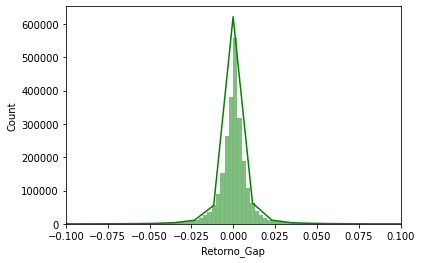

In [7]:

sns.histplot(data['Retorno_Gap'], bins=900, kde=True, color = 'green')
plt.xlim(-0.1, 0.1)

Boxplot retorno gap

(-0.1, 0.1)

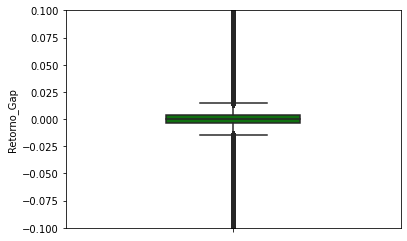

In [8]:
ax = sns.boxplot(y=data["Retorno_Gap"], color='green')
plt.xlim(-1,1)
plt.ylim(-0.1,0.1)

CALCULO RETORNO INTRADIARIO

In [9]:
#Creo columna 'Retorno_Intra'
data['Retorno_Intra'] =data.apply(lambda row:
    np.log(row.Close/row.Open), axis=1).fillna(0)

Histograma retorno intradiario

(-0.1, 0.1)

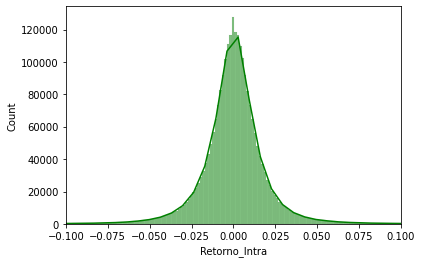

In [10]:

sns.histplot(data['Retorno_Intra'], bins=900, kde=True, color = 'green')
plt.xlim(-0.1, 0.1)

Boxplot retorno intradiario

(-0.1, 0.1)

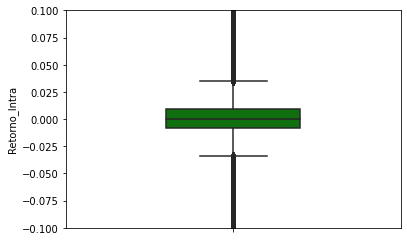

In [11]:
ax = sns.boxplot(y=data["Retorno_Intra"], color='green')
plt.xlim(-1,1)
plt.ylim(-0.1,0.1)

CALCULO VARIACION

In [12]:
#Creo columna 'Variaciones'
data['Variacion'] = data['Adj Close'].pct_change()

for i in range(0,data.shape[0]-1):
    if data.loc[i,'Ticker']!= data.loc[i+1,'Ticker']:
            data['Variacion'][i+1] = 0

data['Variacion'].fillna(0,inplace=True)

Histograma variacion

(-0.1, 0.1)

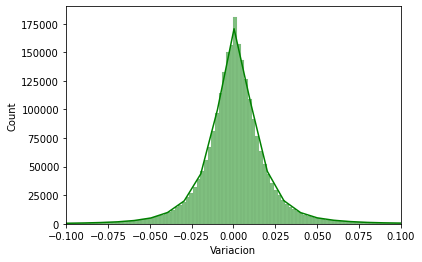

In [13]:

sns.histplot(data['Variacion'], bins=900, kde=True, color = 'green')
plt.xlim(-0.1, 0.1)

Boxplot variacion

(-0.1, 0.1)

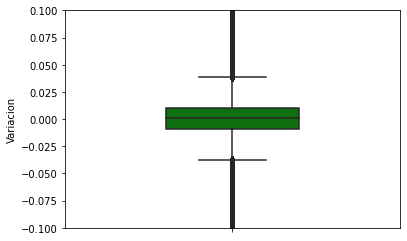

In [14]:
ax = sns.boxplot(y=data["Variacion"], color='green')
plt.xlim(-1,1)
plt.ylim(-0.1,0.1)

GRAFICO COMPARACION

Comparo las distintas dispersiones de las variables calculadas.

c:\Users\notebook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\notebook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\notebook\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to

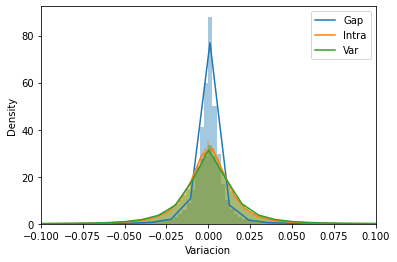

In [15]:
sns.distplot(data['Retorno_Gap'],bins=900)
sns.distplot(data['Retorno_Intra'],bins=900)
sns.distplot(data['Variacion'],bins=900)

plt.legend(['Gap','Intra','Var'])
plt.xlim(-0.1,0.1)
plt.show()

CALCULO VOLATILIDAD

In [16]:
#Creo columna 'Volatilidad'
data['Volatilidad']=(data['Variacion'].rolling(250).std()*100*(250)**0.5).fillna(0)

Histograma volatilidad

(0.0, 150.0)

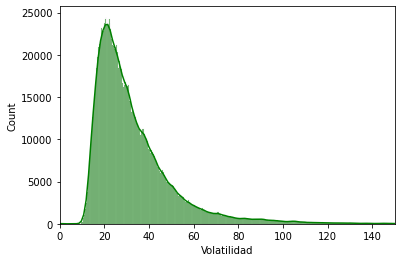

In [17]:

sns.histplot(data['Volatilidad'], bins=900, kde=True, color = 'green')
plt.xlim(0, 150)

Boxplot volatilidad

(0.0, 150.0)

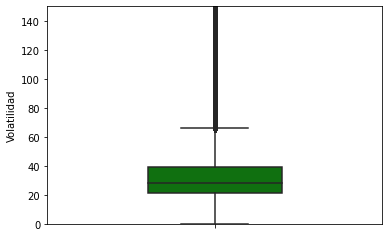

In [18]:
ax = sns.boxplot(y=data["Volatilidad"], color='green')
plt.xlim(-1,1)
plt.ylim(0,150)

MEJOR DIA PARA INVERTIR SEGUN MOVIMIENTO GAP

In [21]:
data_gap = data.groupby('Dias_de_la_semana')['Retorno_Gap'].mean().reset_index()
Dias = {'Lunes':0,'Martes':1,'Miercoles':2, 
        'Jueves':3, 'Viernes':4}
data_gap['Dias_de_la_semana'] = Dias

data_gap

,Dias_de_la_semana,Retorno_Gap
0,Lunes,0.000041
1,Martes,0.000578
2,Miercoles,0.000115
3,Jueves,0.000057
4,Viernes,0.000223


Grafico movimiento gap

In [22]:
fig = px.bar(data_gap, x='Dias_de_la_semana', y='Retorno_Gap', 
    color='Dias_de_la_semana',
    hover_name='Dias_de_la_semana', color_discrete_sequence=[
    px.colors.qualitative.Alphabet[6],
    px.colors.qualitative.Alphabet[11],px.colors.qualitative.Plotly[2],
    px.colors.qualitative.Plotly[7],px.colors.qualitative.G10[5]],
    title='Mejor dia para invertir en base a los movimientos del retorno gap')
fig.show()

![](gap.png)

Segun el retorno de los movimientos gap el mejor dia para invertir seria el lunes debido a la apertura del martes.

MEJOR DIA PARA INVERTIR SEGUN MOVIMIENTO INTRADIARIO

In [23]:
data_intra = data.groupby('Dias_de_la_semana')['Retorno_Intra'].mean().reset_index()
Dias = {'Lunes':0,'Martes':1 ,'Miercoles':2,
        'Jueves':3,'Viernes':4}
data_intra['Dias_de_la_semana'] = Dias
data_intra

,Dias_de_la_semana,Retorno_Intra
0,Lunes,-0.000307
1,Martes,0.000187
2,Miercoles,0.000239
3,Jueves,0.000520
4,Viernes,0.000250


Grafico movimiento entradiario

In [24]:
fig = px.bar(data_intra, x='Dias_de_la_semana', y='Retorno_Intra',
    color='Dias_de_la_semana',
    hover_name='Dias_de_la_semana', color_discrete_sequence=[
    px.colors.qualitative.Alphabet[6],px.colors.qualitative.Alphabet[11],
    px.colors.qualitative.Plotly[2],px.colors.qualitative.Plotly[7],
    px.colors.qualitative.G10[5]],
    title='Mejor dia para invertir en base a los movimientos del retorno intradiario')
fig.show()

![](intra.png)

Segun el retorno de los movimientos intradiarios el mejor dia para invertir seria el jueves cuando abren las acciones.

DISTRIBUCION DATOS INTRADIARIOS Y GAP FILTRADOS 

In [25]:
x0 = data_gap['Retorno_Gap']
x1 = data_intra['Retorno_Intra']

fig = go.Figure()
fig.add_trace(go.Box(x=x0, name='Retorno_Gap'))
fig.add_trace(go.Box(x=x1, name='Retorno_Intra'))

fig.show()

![](intra_gap.png)

MEJORES INDUSTRIAS DEL SP500 EN LAS CUALES INVERTIR

Para llegar a una recomendacion de industrias en las cuales invertir estoy usando la variacion en relacion a dichas industrias.

En este caso para realizar el grafico estoy usando la informacion completa de los ultimos 21 años y se puede apreciar que las industrias que mas variacion han tenido son las de Information Technology, Cunsumer Discretionary y Healt Care.

<AxesSubplot:xlabel='GICS', ylabel='Variacion'>

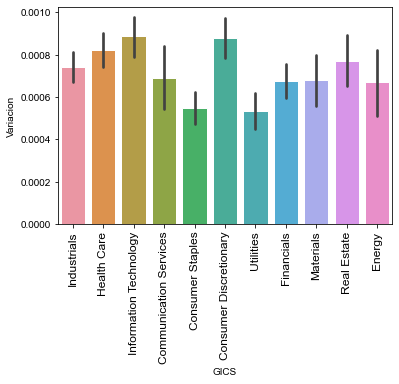

In [26]:
plt.xticks(fontsize=12,rotation=90)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data= data, x = 'GICS', y = "Variacion")

En este caso filtro la informacion para poder ver la de los ultimos cinco años y lo que indica es que Information Technology, Cunsumer Discretionary y Healt Care siguen siendo las que mas variacion tienen.

In [27]:
#Creo dataframe con la data filtrada
filtro_anios = data[data["Date"] > '2016-12-31']

<AxesSubplot:xlabel='GICS', ylabel='Variacion'>

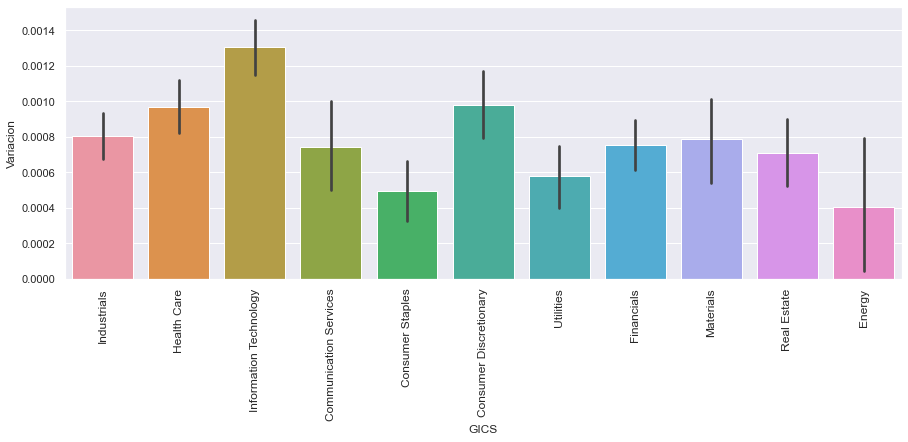

In [28]:
plt.xticks(fontsize=12,rotation=90)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data= filtro_anios, x = 'GICS', y = "Variacion")

Ahora ademas de filtrar por año agrupo las insdustrias para graficar la que mas variacion tiene y la que menos variacion tiene.

In [29]:
data_indus = filtro_anios.groupby(['Date', 'GICS']).agg({'Variacion':'mean'}).reset_index()
data_filtrada = filtro_anios.groupby("Date").agg({ 'Open':'mean', 'High':'mean', 'Low':'mean',
'Close':'mean','Adj Close':'mean','Retorno_Gap':'mean', 'Retorno_Intra':'mean','Variacion':'mean'})

lista = filtro_anios.GICS.unique()

dataindustria_fil = data_filtrada.groupby("Date").agg({ 'Variacion':'mean'})
dataindustria_fil.rename(columns={'Variacion': 'SP&500'}, inplace=True)

industrias=pd.DataFrame()
for x in range(0,len(lista)):
    industrias=data[data.GICS==lista[x]]
    dataindustria_fil[lista[x]]=industrias.groupby("Date")['Variacion'].mean()

dataindustria_fil.reset_index(inplace=True)
dataindustria_filx2=dataindustria_fil.drop(columns=['Industrials', 'Health Care',
'Communication Services','Financials','Materials','Real Estate', 'Utilities'])

dataindustria_filx2.head(5)

,Date,SP&500,Information Technology,Consumer Staples,Consumer Discretionary,Energy
0,2017-01-03 00:00:00,0.007600,0.007461,0.003490,0.006032,0.016419
1,2017-01-04 00:00:00,0.010962,0.011897,0.003064,0.017008,-0.003276
2,2017-01-05 00:00:00,-0.002650,-0.004818,-0.001199,-0.002607,0.001374
3,2017-01-06 00:00:00,0.003267,0.007055,-0.000356,-0.000393,-0.001427
4,2017-01-09 00:00:00,-0.004492,0.001740,-0.008327,-0.004042,-0.016509


Grafico de los años filtrados y las industrias agrupadas por las de mas y menos variacion

In [30]:
fig = px.line(dataindustria_fil, x="Date", y=dataindustria_filx2.columns,
              hover_data={"Date": "|%Y %m, %d"},
              title='Industrias con mas y menos variacion')
fig.update_xaxes(dtick="M6", tickformat="%Y%m\n", ticklabelmode="period")
fig.show()

![](industriavar.png)

Para un perfil de inversion mas abierto a tomar riesgos mi recomendacion seria que se invierta en Information Technology, Cunsumer Discretionary y Healt Care ya que tienen mucha variabilidad pero tambien estan en crecimiento. 

MOMENTOS DE ALTA VOLATILIDAD QUE AFECTARON AL SP500

In [31]:
#Creo dataframe para graficar
volatilidad_data = data.groupby("Date").agg({ 'Open':'mean', 'High':'mean',
    'Low':'mean', 'Close':'mean','Adj Close':'mean','Retorno_Intra':'mean',
    'Retorno_Gap':'mean', 'Variacion':'mean', 'Volatilidad':'mean'})
volatilidad_data= volatilidad_data.reset_index()

En los siguientes graficos se pueden ver los momentos de mayor volatilidad.

Grafico volatilidad

In [32]:
fig = px.line(volatilidad_data, x='Date', y="Volatilidad",
    color_discrete_sequence=["darkred"])
fig.show()

![](volatilidad.png)

Grafico variacion afectada

In [33]:
fig = px.line(volatilidad_data, x='Date', y="Variacion",
    color_discrete_sequence=["darkred"])
fig.show()

![](volatilidadvar.png)

En estos dos graficos se puede observar que en los momentos donde hay mas volatilidad que es en el 2008 y en el 2020 la variacion tambien se ve afectada.

EN BASE AL CRECIMIENTO 9 MEJORES EMPRESAS EN LAS CUALES INVERTIR

In [34]:
filtro_empresas = filtro_anios.drop(["Open","High","Low","Close","Volume",
    "Dias_de_la_semana","Retorno_Intra","Retorno_Gap","Variacion",
    "Volatilidad"], axis=1)

filtro_empresasmin = filtro_empresas[filtro_empresas["Date"] ==
                    filtro_empresas["Date"].min()]
filtro_empresasmax = filtro_empresas[filtro_empresas["Date"] == 
                    filtro_empresas["Date"].max()]

filtro_empresascomp = pd.merge(filtro_empresasmin,
                filtro_empresasmax, on=["Ticker"])

filtro_empresascomp['Var_Porcentual'] = filtro_empresascomp.apply(lambda row:
    (((row["Adj Close_y"]/row["Adj Close_x"])-1)*100), axis = 1).fillna(0)

filtro_empresascomp = filtro_empresascomp.sort_values('Var_Porcentual',
                    ascending=False)

filtro_empresascomp = filtro_empresascomp.drop(["Date_x","Adj Close_x",
                    "Date_y","Adj Close_y", "GICS_x"], axis=1)
filtro_empresascomp = filtro_empresascomp.rename(columns={"GICS_y":"GICS"})

filtro_empresascomp = filtro_empresascomp.head(9)

In [35]:
filtro_empresascomp

,Ticker,GICS,Var_Porcentual
168,ENPH,Information Technology,17653.334488
432,TSLA,Consumer Discretionary,2366.334843
411,SEDG,Information Technology,2039.015229
177,ETSY,Consumer Discretionary,1768.770980
28,AMD,Information Technology,1169.903675
199,FTNT,Information Technology,1094.488700
338,NVDA,Information Technology,1075.412559
171,EPAM,Information Technology,957.398706
143,DXCM,Health Care,829.287549


Grafico mejores nueve empresas

In [36]:
fig = px.bar(filtro_empresascomp, x='Ticker', y='Var_Porcentual', color='Ticker',
            hover_name='Ticker', color_discrete_sequence=[
            px.colors.qualitative.Alphabet[6],px.colors.qualitative.Alphabet[11],
            px.colors.qualitative.Plotly[2],px.colors.qualitative.Plotly[7],
            px.colors.qualitative.G10[5]],
            title='Nueve mejores empresas para invertir segun crecimiento')
fig.show()

![](9empresas.png)

Analizando el crecimiento de las empresas las nueve mejores para invertir serian las que indica el grafico.